In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import shutil
import random
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import os
# from keras import layers
# from keras.applications import VGG19
# from keras.applications.inception_v3 import InceptionV3
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt
# import cv2

In [1]:
%cd "D:\MaskDetection"

D:\MaskDetection


In [8]:
os.chdir("D:\MaskDetection\data")

%pwd

<h1> Making seperate Directories for testset and training set </h1>

In [10]:
os.makedirs("train/with_mask")
os.makedirs("train/without_mask")
os.makedirs("test/with_mask")
os.makedirs("test/without_mask")

In [32]:
for c in random.sample(glob.glob("D:\MaskDetection\data\with_mask\*.jpg"),100):
    shutil.move(c,'train/with_mask')
    

In [31]:
for c in random.sample(glob.glob("D:\MaskDetection\data\without_mask\*.jpg"),100):
    shutil.move(c,'train/without_mask')

In [29]:
for c in random.sample(glob.glob("D:\MaskDetection\data\with_mask\*.jpg"),100):
    shutil.move(c,'test/with_mask')

In [30]:
for c in random.sample(glob.glob("D:\MaskDetection\data\without_mask\*.jpg"),100):
    shutil.move(c,'test/without_mask')

In [54]:
test_path = r'D:\MaskDetection\data\test'
train_path = r'D:\MaskDetection\data\train'

In [55]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

<h1> Rescaling the images to for Normalisation for Better Performance </h1>

In [56]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_path,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(test_path,target_size=(150, 150),batch_size=32,class_mode='binary')



Found 1200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [58]:
img,labels= next(train_generator)


In [63]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

<h1> Verifying the images and labels </h1>

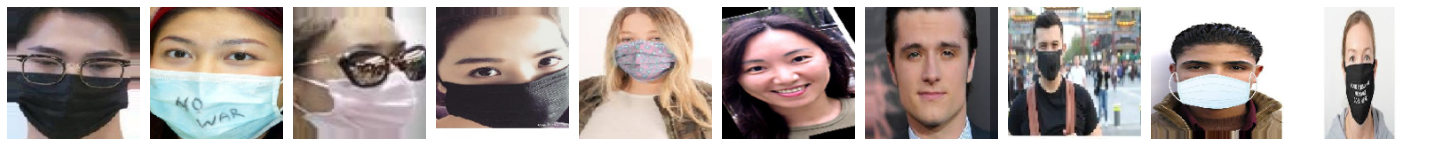

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0.]


In [66]:
plotImages(img)
print(labels)

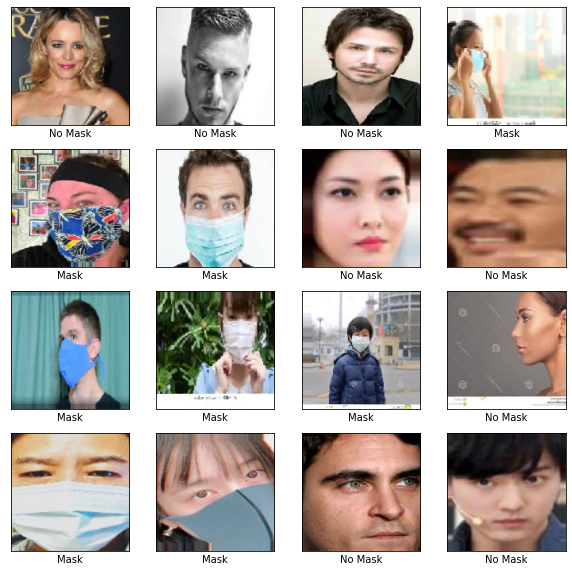

In [79]:
images, labels = next(iter(train_generator))
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('No Mask' if labels[i] == 1. else 'Mask')

In [75]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [77]:
train_generator.image_shape

(150, 150, 3)

<h1> Building a Model </h1>